# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 로지스틱 회귀 구현
> 선형 회귀를 이진 분류를 바꾸는 방법이다. <br>
> 선형 회귀 결과 값을 시그모이드 함수에 넣어 0과 1 사이의 값으로 출력하여 분류한다.

##### 데이터 로드

In [3]:
# 데이터 로드
import requests
import os.path
import csv

birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\r\n')
birth_data

['LOW\tAGE\tLWT\tRACE\tSMOKE\tPTL\tHT\tUI\tBWT',
 '1\t28\t113\t1\t1\t1\t0\t1\t709',
 '1\t29\t130\t0\t0\t0\t0\t1\t1021',
 '1\t34\t187\t1\t1\t0\t1\t0\t1135',
 '1\t25\t105\t1\t0\t1\t1\t0\t1330',
 '1\t25\t85\t1\t0\t0\t0\t1\t1474',
 '1\t27\t150\t1\t0\t0\t0\t0\t1588',
 '1\t23\t97\t1\t0\t0\t0\t1\t1588',
 '1\t24\t128\t1\t0\t1\t0\t0\t1701',
 '1\t24\t132\t1\t0\t0\t1\t0\t1729',
 '1\t21\t165\t0\t1\t0\t1\t0\t1790',
 '1\t32\t105\t1\t1\t0\t0\t0\t1818',
 '1\t19\t91\t0\t1\t1\t0\t1\t1885',
 '1\t25\t115\t1\t0\t0\t0\t0\t1893',
 '1\t16\t130\t1\t0\t0\t0\t0\t1899',
 '1\t25\t92\t0\t1\t0\t0\t0\t1928',
 '1\t20\t150\t0\t1\t0\t0\t0\t1928',
 '1\t21\t190\t1\t0\t0\t0\t1\t1928',
 '1\t24\t155\t0\t1\t1\t0\t0\t1936',
 '1\t21\t103\t1\t0\t0\t0\t0\t1970',
 '1\t20\t125\t1\t0\t0\t0\t1\t2055',
 '1\t25\t89\t1\t0\t1\t0\t0\t2055',
 '1\t19\t102\t0\t0\t0\t0\t0\t2082',
 '1\t19\t112\t0\t1\t0\t0\t1\t2084',
 '1\t26\t117\t0\t1\t1\t0\t1\t2084',
 '1\t24\t138\t0\t0\t0\t0\t0\t2100',
 '1\t17\t130\t1\t1\t1\t0\t1\t2125',
 '1\t20\t120\t1\t1\t0

In [4]:
birth_header = birth_data[0].split('\t')
birth_header

['LOW', 'AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'BWT']

In [5]:
birth_data = [[float(x) for x in y.split('\t') if len(x) >= 1] for y in birth_data[1:] if len(y) >= 1]
birth_data

[[1.0, 28.0, 113.0, 1.0, 1.0, 1.0, 0.0, 1.0, 709.0],
 [1.0, 29.0, 130.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1021.0],
 [1.0, 34.0, 187.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1135.0],
 [1.0, 25.0, 105.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1330.0],
 [1.0, 25.0, 85.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1474.0],
 [1.0, 27.0, 150.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1588.0],
 [1.0, 23.0, 97.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1588.0],
 [1.0, 24.0, 128.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1701.0],
 [1.0, 24.0, 132.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1729.0],
 [1.0, 21.0, 165.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1790.0],
 [1.0, 32.0, 105.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1818.0],
 [1.0, 19.0, 91.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1885.0],
 [1.0, 25.0, 115.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1893.0],
 [1.0, 16.0, 130.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1899.0],
 [1.0, 25.0, 92.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [1.0, 20.0, 150.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1928.0],
 [1.0, 21.0, 190.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1928.0],
 [1.0, 24.0, 155.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1936.0],
 [1.0, 21.0, 103.0, 1.0, 0.0, 0.0

In [6]:
x_vals = np.array([x[1:8] for x in birth_data])
y_vals = np.array([x[0] for x in birth_data])

##### 구현

In [7]:
# 데이터 분할
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

# 정규화
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

# 일괄 작업 크기 선언
batch_size = 25

# 플레이스홀더 및 변수 선언
x_data = tf.placeholder(shape=[None,7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[7,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 모델 선언
model_output = tf.add(tf.matmul(x_data, A), b)

# 시그모이드 함수가 포함된 비용 함수 선언
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

# 최적화 함수 선언
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

# 학습
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

loss_vec = []
train_acc = []
test_acc = []

for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])})
    test_acc.append(temp_acc_test)
    
    if (i+1) % 300 == 0:
        print('Loss = ' + str(temp_loss))

Loss = 0.69541323
Loss = 0.7177138
Loss = 0.5790775
Loss = 0.58325326
Loss = 0.57728076


##### 정확도 그래프

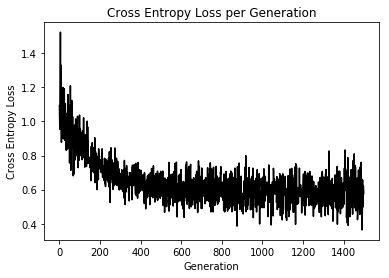

In [8]:
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

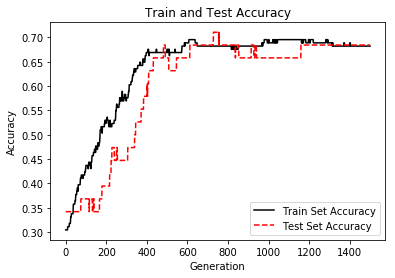

In [9]:
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()